In [1]:
import supereeg as se
from supereeg.helpers import _get_corrmat
from supereeg.model import _bo2model
import numpy as np
import glob
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
#plt.switch_backend('agg')
import pickle
from config import config
from stats import time_by_file_index_chunked_local, corrmat, z2r, r2z
from bookkeeping import remove_electrode, known_unknown, alter_avemat
%matplotlib inline

## load brain object, subject's npz file, model expanded to full locations, average matrix, and the full locations

In [2]:

bo_fname = '/Users/lucyowen/Desktop/debug_mats/bo/BW013.bo'
bo = se.load(bo_fname)

file_name = os.path.basename(os.path.splitext(bo_fname)[0])

npz_infile = '/Users/lucyowen/Desktop/debug_mats/bo/BW013.npz'
sub_data = np.load(npz_infile, mmap_mode='r')

mo = np.load('/Users/lucyowen/Desktop/debug_mats/full_mats/BW013.npz', mmap_mode='r')

ave_data = np.load('/Users/lucyowen/Desktop/debug_mats/ave_mat/ave_mat.npz', mmap_mode='r')

R = np.load('/Users/lucyowen/Desktop/debug_mats/pyFR_locs/locs.npz')['locs']



## designate electrode to reconstruct and filter brain object

In [3]:
elec_ind = int(24)

bo.get_filtered_bo()

## subject's locations

In [4]:
R_K_subj = bo.get_locs().as_matrix()
np.shape(R_K_subj)

(28, 3)

## get info for held out electrode

In [5]:
electrode = bo.locs.iloc[elec_ind]

## remove electrode and get indices

In [6]:
R_K_removed, other_inds = remove_electrode(R_K_subj, R_K_subj, elec_ind)

## Create correlation matrix for patient's thresholded electrodes

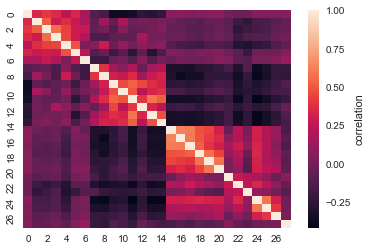

In [7]:
sub_corrmat = _get_corrmat(bo)
sub_corrmat[np.where(np.isnan(sub_corrmat))] = 0

mo4_plot = se.Model(numerator=sub_corrmat, denominator=np.ones(np.shape(sub_corrmat)), locs=R_K_subj, n_subs=1)
mo4_plot.plot_data()

## Hold out one electrode

In [8]:
bo_sliced = bo[:, other_inds]

bo.info()

bo_sliced.info()

Number of electrodes: 28
Recording time in seconds: [[4562.838688]]
Sample Rate in Hz: [array([499.907])]
Number of sessions: 1
Date created: Mon May 21 19:43:06 2018
Meta data: BW013
Number of electrodes: 27
Recording time in seconds: [[4562.838688]]
Sample Rate in Hz: [array([499.907])]
Number of sessions: 1
Date created: Mon May 21 19:43:06 2018
Meta data: BW013


## Expand to all subject locations

In [12]:
num_corrmat_x, denom_corrmat_x, n_subs = _bo2model(bo_sliced, R_K_subj, 20)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


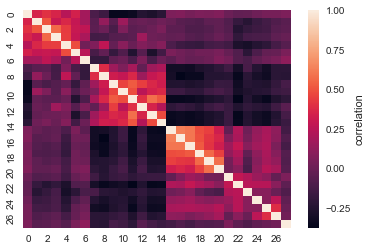

In [13]:
C_est=np.divide(num_corrmat_x, denom_corrmat_x)
C_est[np.where(np.isnan(C_est))] = 0
sub_model = z2r(C_est) + np.eye(np.shape(C_est)[0])

mo5_plot = se.Model(numerator=sub_model, denominator=np.ones(np.shape(C_est)), locs=R_K_subj, n_subs=1)
mo5_plot.plot_data()

In [30]:
R_K_removed

array([[-20.2 ,   8.03, -42.44],
       [-20.2 ,  -0.31, -40.54],
       [-22.22,  -9.73, -37.51],
       [-24.24, -18.12, -34.42],
       [-26.26, -27.8 , -25.45],
       [-26.26, -36.19, -22.35],
       [-32.32, -56.32, -10.41],
       [ 32.32,  27.54, -40.12],
       [ 28.28,  18.33, -41.85],
       [ 28.28,  10.14, -43.51],
       [ 26.26,  -0.26, -41.73],
       [ 26.26,  -9.62, -39.89],
       [ 28.28, -17.96, -37.99],
       [ 28.28, -27.69, -27.82],
       [ 28.28, -36.14, -23.54],
       [ 50.51,  -3.66,  33.54],
       [ 48.48, -10.35,  44.07],
       [ 44.44, -20.03,  52.27],
       [ 42.42, -26.41,  56.28],
       [ 38.38, -32.69,  58.13],
       [ 33.33, -40.  ,  59.92],
       [ 57.58, -58.17,  29.58],
       [ 50.51,  15.55,  20.41],
       [ 50.51,  25.58,  26.38],
       [ 50.51,  23.99,  16.5 ],
       [ 48.48,  18.22,   7.49],
       [ 53.54,  12.2 ,   3.91]])

In [31]:
R_K_subj

array([[-20.2 ,   8.03, -42.44],
       [-20.2 ,  -0.31, -40.54],
       [-22.22,  -9.73, -37.51],
       [-24.24, -18.12, -34.42],
       [-26.26, -27.8 , -25.45],
       [-26.26, -36.19, -22.35],
       [-32.32, -56.32, -10.41],
       [ 32.32,  27.54, -40.12],
       [ 28.28,  18.33, -41.85],
       [ 28.28,  10.14, -43.51],
       [ 26.26,  -0.26, -41.73],
       [ 26.26,  -9.62, -39.89],
       [ 28.28, -17.96, -37.99],
       [ 28.28, -27.69, -27.82],
       [ 28.28, -36.14, -23.54],
       [ 50.51,  -3.66,  33.54],
       [ 48.48, -10.35,  44.07],
       [ 44.44, -20.03,  52.27],
       [ 42.42, -26.41,  56.28],
       [ 38.38, -32.69,  58.13],
       [ 33.33, -40.  ,  59.92],
       [ 57.58, -58.17,  29.58],
       [ 50.51,  15.55,  20.41],
       [ 50.51,  25.58,  26.38],
       [ 50.51,  30.01,  20.08],
       [ 50.51,  23.99,  16.5 ],
       [ 48.48,  18.22,   7.49],
       [ 53.54,  12.2 ,   3.91]])

## Find known and unknown indices

In [14]:
known_inds, unknown_inds, electrode_ind = known_unknown(R_K_subj, R_K_removed, R_K_subj, elec_ind)

In [15]:
Kaa = np.float32(sub_model[known_inds, :][:, known_inds])
Kba = np.float32(sub_model[unknown_inds, :][:, known_inds])

(27, 27)

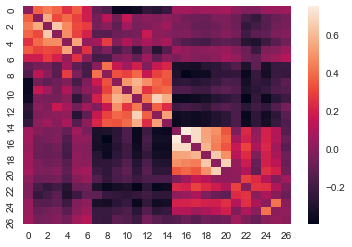

In [16]:
sns.heatmap(Kaa)
np.shape(Kaa)

(1, 27)

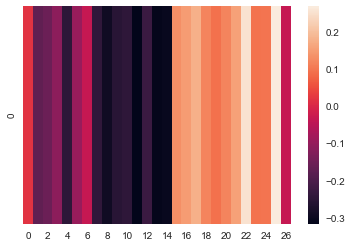

In [17]:
sns.heatmap(Kba)
np.shape(Kba)

In [25]:
Kaa = np.float32(sub_corrmat[known_inds, :][:, known_inds])
Kba = np.float32(sub_corrmat[unknown_inds, :][:, known_inds])

(27, 27)

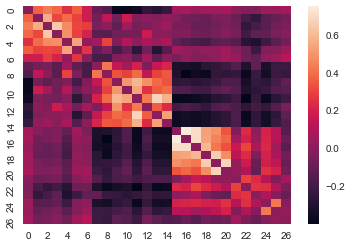

In [26]:
sns.heatmap(Kaa)
np.shape(Kaa)

(1, 27)

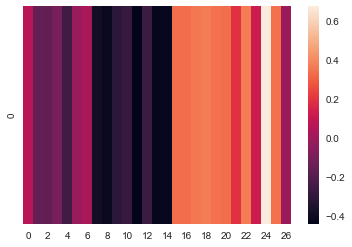

In [27]:
sns.heatmap(Kba)
np.shape(Kba)

In [34]:
bo.data

,0,1,2,3,4,5,7,8,9,10,...,20,21,22,31,32,35,36,37,38,39
0,414.155121,174.007111,-73.151627,-204.343033,200.495514,-247.257004,-45.009872,-479.011993,248.050034,125.446228,...,-66.275185,-92.035339,41.478706,-282.234467,114.238876,2.082974,-240.723602,551.438416,31.555475,-159.953125
1,408.632935,169.812744,-77.410606,-207.804413,201.458405,-248.053757,-50.390133,-480.877838,246.307495,129.508423,...,-64.587631,-91.596771,42.886429,-279.814087,111.360687,-0.590422,-242.657394,549.606995,24.764679,-156.603867
2,400.594299,167.859070,-81.127457,-210.431488,202.095764,-242.371307,-53.096859,-482.657410,247.257370,133.286591,...,-60.959579,-89.250824,42.450161,-279.294739,112.510742,-0.076197,-241.504440,549.652527,20.933435,-152.130493
3,397.222565,166.392914,-82.213432,-208.448471,204.033188,-233.634827,-54.339382,-482.576233,250.056992,138.157242,...,-59.060139,-89.193474,41.610420,-279.189636,109.895493,-1.507315,-243.961960,546.011169,16.421883,-148.336380
4,395.899506,166.026154,-79.574234,-205.716171,208.473465,-229.639618,-55.951588,-481.876862,249.962326,140.977478,...,-57.859627,-86.688591,42.321793,-277.732147,108.658630,-2.062157,-246.148178,543.721924,17.894571,-146.649261
5,388.252960,159.322708,-81.658890,-208.457428,207.362000,-234.187698,-60.953674,-483.717682,249.508514,141.156250,...,-56.002159,-84.894196,42.597317,-274.821381,109.143593,0.885758,-245.868591,542.966003,22.628059,-138.884445
6,381.382446,155.221237,-82.012589,-214.449112,204.083496,-242.550400,-63.884216,-484.482391,249.728470,144.267044,...,-52.854229,-83.977402,41.768742,-271.714417,107.700294,0.212037,-249.500656,540.319702,23.772881,-134.388336
7,379.688202,155.308792,-80.863365,-217.399109,201.071075,-252.245819,-67.487564,-483.006653,250.943863,146.907379,...,-52.468296,-84.492569,38.827717,-267.308228,108.758446,0.390763,-249.369171,539.530090,26.258104,-128.989349
8,378.785309,151.517868,-83.615204,-221.650467,197.055267,-263.819550,-69.390457,-481.207672,252.774033,150.150665,...,-56.596481,-89.364357,33.281517,-264.489441,109.236534,1.031291,-247.738586,541.365723,31.413858,-123.510323
9,378.704895,145.783340,-84.440094,-221.820221,199.312943,-266.248505,-70.406494,-479.769012,254.419052,150.716064,...,-58.677982,-91.562057,29.868649,-258.819550,106.277260,-0.760868,-248.711243,544.556946,32.697277,-122.586693


In [19]:
corrs = time_by_file_index_chunked_local(npz_infile, sub_model, known_inds, unknown_inds, electrode_ind, other_inds,
                                            elec_ind, time_series=False)

corrs

array([[0.49991629]])

In [22]:
corrs = time_by_file_index_chunked_local(npz_infile, sub_corrmat, known_inds, unknown_inds, electrode_ind, other_inds,
                                            elec_ind, time_series=False)

corrs

array([[0.24511406]])

In [24]:
sub_model

array([[ 0.00000000e+00,  3.67984518e-01,  4.29606133e-01,
         3.75719951e-01,  2.51166201e-01,  3.55801708e-01,
         1.82697382e-01, -1.03925027e-01, -1.55732468e-01,
        -3.63119422e-01, -3.61170447e-01, -3.44164632e-01,
        -2.50691320e-01, -2.76433790e-01, -2.28280711e-01,
         6.36104659e-02,  7.15607126e-02,  4.17868966e-02,
         6.15829905e-02,  5.85870644e-02,  7.55842178e-02,
         2.41992715e-03, -2.80230602e-02, -2.62573021e-02,
         1.65035448e-02,  4.09957390e-02,  3.99853631e-02,
         5.98683437e-02],
       [ 3.67984518e-01,  0.00000000e+00,  5.56961351e-01,
         3.12761013e-01,  3.87653818e-01,  2.94695107e-01,
         1.83003126e-01, -5.51392745e-02,  1.31490262e-01,
        -6.24510838e-02,  1.58044733e-01, -2.63202426e-02,
        -1.42043799e-05, -2.61210048e-02,  1.21137472e-02,
        -1.17052831e-02, -6.39246068e-02, -7.07703842e-02,
        -8.67024672e-02, -4.16209954e-02, -3.27652193e-02,
        -8.25851715e-02, -1.82

## inds after kurtosis threshold: known_inds = known electrodes; unknown_inds = all the rest


In [ ]:
known_inds, unknown_inds, electrode_ind = known_unknown(R, R_K_removed, R_K_subj, elec_ind)

In [ ]:
### across subjects:

Model_across, count = alter_avemat(ave_data, mo)

Model_across[np.where(np.isnan(Model_across))] = 0
Model = Model_across + np.eye(np.shape(Model_across)[0])


In [ ]:
Kaa = np.float32(Model[known_inds, :][:, known_inds])
Kba = np.float32(Model[unknown_inds, :][:, known_inds])

In [ ]:
sns.heatmap(Kaa)
np.shape(Kaa)

In [ ]:
sns.heatmap(Kba)
np.shape(Kba)

In [ ]:
sns.heatmap(Kba[electrode_ind])

In [ ]:
mo1_plot = se.Model(numerator=Model, denominator=np.ones(np.shape(Model)), locs=R, n_subs=1)
mo1_plot.plot_data()

In [ ]:
corrs1 = time_by_file_index_chunked_local(npz_infile, Model_across, known_inds, unknown_inds, electrode_ind, other_inds,
                                            elec_ind, time_series=False)

In [ ]:
corrs1

In [ ]:
### within subject:
C_est = mo['C_est']
C_est[np.where(np.isnan(C_est))] = 0
Model_within = z2r(C_est)

mo_plot = se.Model(numerator=Model_within, denominator=np.ones(np.shape(Model_within)), locs=R, n_subs=1)
mo_plot.plot_data()

In [ ]:
Kaa = np.float32(Model_within[known_inds, :][:, known_inds])
Kba = np.float32(Model_within[unknown_inds, :][:, known_inds])

In [ ]:
sns.heatmap(Kaa)
np.shape(Kaa)

In [ ]:
sns.heatmap(Kba)
np.shape(Kba)

In [ ]:
sns.heatmap(Kba[electrode_ind])

In [ ]:
mo2_plot = se.Model(numerator=Model_within, denominator=np.ones(np.shape(Model_within)), locs=R, n_subs=1)
mo2_plot.plot_data()

In [ ]:
corrs2 = time_by_file_index_chunked_local(npz_infile, Model_within, known_inds, unknown_inds, electrode_ind, other_inds,
                                            elec_ind, time_series=False)
corrs2

In [ ]:
### all subjects:
Model_all = ave_data['average_matrix']
Model_all[np.where(np.isnan(Model_all))] = 0
Model_all = z2r(Model_all)


In [ ]:
np.shape(Model_all)

In [ ]:
Kaa = np.float32(Model_all[known_inds, :][:, known_inds])
Kba = np.float32(Model_all[unknown_inds, :][:, known_inds])

In [ ]:
sns.heatmap(Kaa)
np.shape(Kaa)

In [ ]:
sns.heatmap(Kba)
np.shape(Kba)

In [ ]:
sns.heatmap(Kba[electrode_ind])

In [ ]:
mo3_plot = se.Model(numerator=Model_all, denominator=np.ones(np.shape(Model_all)), locs=R, n_subs=1)
mo3_plot.plot_data()

In [ ]:
corrs3 = time_by_file_index_chunked_local(npz_infile, Model_all, known_inds, unknown_inds, electrode_ind, other_inds,
                                            elec_ind, time_series=False)

In [ ]:
corrs3